# **Data Cleaning and Manipulation**

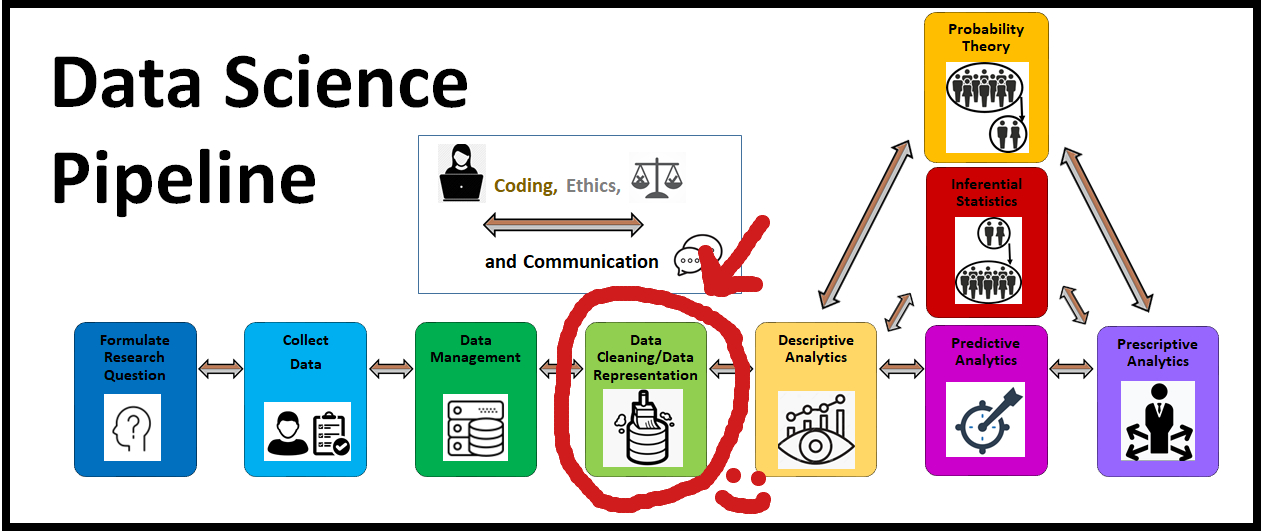

**DISCLAIMER:** You are not expected to remember every function and every bit of syntax we use today. If you aren't familiar with Python or pandas, it may seem like a lot. This is perfectly normal; as I (Addison) famously once said, computer/data science is 20% perspiration, 5% inspiration, and 75% documentation. That said, here is a super useful pandas cheat sheet containing information about most of the functions we will be using today, along with many others: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf


# Research Question
Which professor has the easiest classes at UIUC? Or, which professor will give me the largest guarantee that I will get an A? 

The research question may not seem particularly relevant at this stage, but in a real project it shapes all the decisions you make about data cleaning. 

## Data Collection

For our purpose we are using the GPA dataset from Professor Wade Fagen-Ulmschnieder. Prof Wade has already collected the data for us from official UIUC sources and provided it in a csv file. Here is the link to the website where it is hosted: https://waf.cs.illinois.edu/discovery/gpa.csv

In [1]:
import pandas as pd

df = pd.read_csv("https://waf.cs.illinois.edu/discovery/gpa.csv")
df

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C+,C,C-,D+,D,D-,F,W,Primary Instructor,Students
0,2024,Winter,2024-wi,ADV,150,Introduction to Advertising,ONL,22,18,1,...,0,0,0,0,0,0,0,0,"Hall, Steven R",42
1,2024,Winter,2024-wi,AFRO,100,Intro to African American St,ONL,5,8,6,...,0,1,1,0,0,0,1,0,"McMillion, Desiree Y",25
2,2024,Winter,2024-wi,ASTR,330,Extraterrestrial Life,ONL,1,16,8,...,1,0,2,0,1,0,0,0,"Dunne, Bryan C",37
3,2024,Winter,2024-wi,ATMS,120,Severe and Hazardous Weather,ONL,3,16,3,...,2,2,1,1,1,1,2,0,"Choate, Jessica J",46
4,2024,Winter,2024-wi,BADM,275,Operations Management,ONL,0,49,17,...,2,3,0,0,0,0,0,0,"Hu, Junqi",81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69107,2010,Summer,2010-su,STAT,410,Statistics and Probability II,LEC,5,10,2,...,0,1,3,0,0,0,2,1,"Stepanov, Alexei G",31
69108,2010,Summer,2010-su,STAT,440,Statistical Data Management,LEC,4,12,8,...,0,0,0,0,0,0,0,0,"Unger, David",28
69109,2010,Summer,2010-su,TAM,212,Introductory Dynamics,LEC,0,1,3,...,5,1,1,0,2,0,1,0,"Morgan, William T",28
69110,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,...,3,3,2,0,0,1,1,0,"Ott-Monsivais, Stephanie",21


Each row in this dataset is a class section, and each column contains attributes of this class section.

In [2]:
df.shape 

(69112, 23)

We have 69112 rows and 23 columns in the dataset.

In [3]:
df.columns 

Index(['Year', 'Term', 'YearTerm', 'Subject', 'Number', 'Course Title',
       'Sched Type', 'A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+',
       'D', 'D-', 'F', 'W', 'Primary Instructor', 'Students'],
      dtype='object')

VSCode only shows 20 columns by default, but we can see all the columns here.

In [5]:
df.head(6)

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C+,C,C-,D+,D,D-,F,W,Primary Instructor,Students
0,2024,Winter,2024-wi,ADV,150,Introduction to Advertising,ONL,22,18,1,...,0,0,0,0,0,0,0,0,"Hall, Steven R",42
1,2024,Winter,2024-wi,AFRO,100,Intro to African American St,ONL,5,8,6,...,0,1,1,0,0,0,1,0,"McMillion, Desiree Y",25
2,2024,Winter,2024-wi,ASTR,330,Extraterrestrial Life,ONL,1,16,8,...,1,0,2,0,1,0,0,0,"Dunne, Bryan C",37
3,2024,Winter,2024-wi,ATMS,120,Severe and Hazardous Weather,ONL,3,16,3,...,2,2,1,1,1,1,2,0,"Choate, Jessica J",46
4,2024,Winter,2024-wi,BADM,275,Operations Management,ONL,0,49,17,...,2,3,0,0,0,0,0,0,"Hu, Junqi",81
5,2024,Winter,2024-wi,BADM,300,The Legal Environment of Bus,ONL,72,75,17,...,1,1,0,0,0,0,1,0,"Wright, Margaret",179


If you don't want to scroll through 10 rows, we can see just the first five here.

In [6]:
df.dtypes

Year                   int64
Term                  object
YearTerm              object
Subject               object
Number                 int64
Course Title          object
Sched Type            object
A+                     int64
A                      int64
A-                     int64
B+                     int64
B                      int64
B-                     int64
C+                     int64
C                      int64
C-                     int64
D+                     int64
D                      int64
D-                     int64
F                      int64
W                      int64
Primary Instructor    object
Students               int64
dtype: object

It's important to take a look at the data types to make sure they are what you expect. If you expect numerical data but the data type is object, there may be some missing values or other issues to address.

# Data Cleaning
Often, data collection is not perfect and some values in the dataset end up missing. These are represented in pandas as "`NaN`". Before we can continue with our analysis, we need to go through the data and find all `NaN` values, as they will mess with our findings. Once we've found them, then we can figure out what to do with them.

In [7]:
na_vals = df.isna().sum()
na_vals

Year                      0
Term                      0
YearTerm                  0
Subject                   0
Number                    0
Course Title              0
Sched Type            10051
A+                        0
A                         0
A-                        0
B+                        0
B                         0
B-                        0
C+                        0
C                         0
C-                        0
D+                        0
D                         0
D-                        0
F                         0
W                         0
Primary Instructor      171
Students                  0
dtype: int64

In [8]:
na_vals['Sched Type']/len(df)

0.14543060539414285

14% of the 'Sched Type' column is an `NaN` value! We could remove this column entirely, but it's possible that the class type affects the average GPA (perhaps online classes are easier than in-person ones). Instead, let's drop the rows that contain `NaN` values in this column. Considering our research question, 'Primary Instructor' is likely not valuable for predicting GPA. We can keep it for now, but we would drop it later using `df.drop()`.

In [9]:
df_clean = df.dropna(subset='Sched Type')
df_clean.head()

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C+,C,C-,D+,D,D-,F,W,Primary Instructor,Students
0,2024,Winter,2024-wi,ADV,150,Introduction to Advertising,ONL,22,18,1,...,0,0,0,0,0,0,0,0,"Hall, Steven R",42
1,2024,Winter,2024-wi,AFRO,100,Intro to African American St,ONL,5,8,6,...,0,1,1,0,0,0,1,0,"McMillion, Desiree Y",25
2,2024,Winter,2024-wi,ASTR,330,Extraterrestrial Life,ONL,1,16,8,...,1,0,2,0,1,0,0,0,"Dunne, Bryan C",37
3,2024,Winter,2024-wi,ATMS,120,Severe and Hazardous Weather,ONL,3,16,3,...,2,2,1,1,1,1,2,0,"Choate, Jessica J",46
4,2024,Winter,2024-wi,BADM,275,Operations Management,ONL,0,49,17,...,2,3,0,0,0,0,0,0,"Hu, Junqi",81


There are other techniques to deal with `NaN` values, such as replacing them with some value, like 0 or the column average. This is called "imputation". For example, in sports data, if you find a player who has played in 0 games and who has missing values in many of his statistics, it intuitively makes sense to replace those missing values with 0. In this case, however, there is no meaningful `Sched Type` value represented by `NaN`, so we opt to drop the problematic rows entirely.

In [10]:
len(df) - len(df_clean)

10051

In [11]:
df_clean.isna().sum()

Year                    0
Term                    0
YearTerm                0
Subject                 0
Number                  0
Course Title            0
Sched Type              0
A+                      0
A                       0
A-                      0
B+                      0
B                       0
B-                      0
C+                      0
C                       0
C-                      0
D+                      0
D                       0
D-                      0
F                       0
W                       0
Primary Instructor    146
Students                0
dtype: int64

When we double check, we can see that the correct number of rows were removed. Unfortunately, we still have a problem...

In [12]:
df_clean['Sched Type'].unique()

array(['ONL', 'OLC', 'DIS', 'LCD', 'LEC', 'LBD', 'Onl', 'OLB', 'LAB',
       'INT', 'CNF', 'ST', 'Q', 'PKG', 'OD', 'SEM', 'PR', 'Int'],
      dtype=object)

The format of values in the column is not consistent! We have both "ONL" and "Onl", "INT" and "Int".

In [13]:
df_clean = df_clean.replace({'Int':'INT', 'Onl':'ONL'})

In [14]:
df_clean['Sched Type'].unique()

array(['ONL', 'OLC', 'DIS', 'LCD', 'LEC', 'LBD', 'OLB', 'LAB', 'INT',
       'CNF', 'ST', 'Q', 'PKG', 'OD', 'SEM', 'PR'], dtype=object)

# Dataframe Manipulation

We will now go over some useful functions for combining and filtering data, answering questions in the process.

To start, which courses had the most A+'s ever? The most F's?

In [15]:
df_clean.nlargest(5, 'A+')

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C+,C,C-,D+,D,D-,F,W,Primary Instructor,Students
10958,2021,Fall,2021-fa,CHEM,103,General Chemistry Lab I,OLC,929,419,147,...,31,32,12,15,12,12,31,11,"Huang, Tina H",1864
15330,2021,Summer,2021-su,MBA,562,Intro to Bus Analyt: CommData,ONL,783,77,8,...,3,3,1,0,1,0,4,3,"Hartman, Kevin E",887
8218,2022,Spring,2022-sp,BADM,508,Leadership and Teams,ONL,724,152,35,...,9,2,1,3,0,2,20,2,"Loyd, Denise L",992
13449,2021,Spring,2021-sp,BADM,508,Leadership and Teams,ONL,688,189,48,...,5,3,4,1,0,1,4,0,"Loyd, Denise L",1007
489,2023,Fall,2023-fa,BADM,508,Leadership and Teams,ONL,687,93,35,...,3,3,2,0,1,2,25,3,"Luckman, Elizabeth",891


This is a nice, easy way to get these stats. If you'd rather keep the all the data, just sorted, that's also an option.

In [17]:
df_clean.sort_values('A+', ascending=False)

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C+,C,C-,D+,D,D-,F,W,Primary Instructor,Students
10958,2021,Fall,2021-fa,CHEM,103,General Chemistry Lab I,OLC,929,419,147,...,31,32,12,15,12,12,31,11,"Huang, Tina H",1864
15330,2021,Summer,2021-su,MBA,562,Intro to Bus Analyt: CommData,ONL,783,77,8,...,3,3,1,0,1,0,4,3,"Hartman, Kevin E",887
8218,2022,Spring,2022-sp,BADM,508,Leadership and Teams,ONL,724,152,35,...,9,2,1,3,0,2,20,2,"Loyd, Denise L",992
13449,2021,Spring,2021-sp,BADM,508,Leadership and Teams,ONL,688,189,48,...,5,3,4,1,0,1,4,0,"Loyd, Denise L",1007
489,2023,Fall,2023-fa,BADM,508,Leadership and Teams,ONL,687,93,35,...,3,3,2,0,1,2,25,3,"Luckman, Elizabeth",891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9072,2022,Spring,2022-sp,HDFS,120,Intro to Family Studies,ONL,0,43,0,...,0,7,0,0,0,0,3,0,"Hughes, Robert",56
9073,2022,Spring,2022-sp,HDFS,206,Early Childhood Curriculum Dev,LCD,0,18,0,...,0,2,0,0,0,0,0,0,"Yao, Linlin",26
9075,2022,Spring,2022-sp,HDFS,220,Families in Global Perspective,OLC,0,56,25,...,5,1,0,1,1,0,0,0,"Kramer, Karen",106
48209,2014,Spring,2014-sp,ACCY,302,Decision Making for Atg,LCD,0,4,10,...,1,1,1,0,0,0,0,0,"Fanning, Kirsten B",39


However, this diagnostic is not really representative of a class's difficulty. Larger classes can have more A+'s even if they are more difficult, simply due to the nature of their high enrollment. A more useful question might be, "Which class has the highest GPA?" or for less calculation, "Which class has the highest proportion of A+'s to total enrollment?"

In order to answer this second question, we'll need to manipulate our data a bit. We need a new column containing this proportion.

In [18]:
df_clean['propA+'] = df_clean['A+'] / df_clean['Students']

df_clean.nlargest(5, 'propA+')

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Primary Instructor,Students,propA+
38182,2016,Spring,2016-sp,ACCY,398,Practical Problems in Atg,ONL,139,1,0,...,0,0,0,0,0,0,0,"Nekrasz, Frank",141,0.985816
15146,2021,Spring,2021-sp,TE,360,Lect in Engrg Entrepreneurship,OLC,47,0,0,...,0,0,0,0,0,0,0,"Harbourt, Christopher M",48,0.979167
6763,2022,Fall,2022-fa,KIN,102,Bowling,LAB,37,0,0,...,0,0,0,0,0,0,0,"Soto, Yuliana",38,0.973684
15304,2021,Summer,2021-su,IS,537,Theory & Prct of Data Cleaning,ONL,407,9,0,...,0,0,0,0,0,0,0,NaN,419,0.971360
12790,2021,Fall,2021-fa,SBC,512,Professional SBC Capstone Proj,ONL,61,0,0,...,0,0,0,0,0,0,0,"Clifton, Dionne J",63,0.968254


This gives us a more interesting answer, but we can dig deeper. What if we only want to look at classes with lots of students? Or classes in a certain subject? Plus, lots of students are fine with A's, not just A+'s.

In [19]:
df_clean['propAorA+'] = (df_clean['A+'] + df_clean['A']) / df_clean['Students'] # new column containing the proportion of A's and A+'s to students

df_is = df_clean[(df_clean['Subject'] == "IS") & (df_clean['Students'] > 100)] # look at only IS classes with over 100 students
df_is.nlargest(5, 'propAorA+')

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C-,D+,D,D-,F,W,Primary Instructor,Students,propA+,propAorA+
25230,2019,Summer,2019-su,IS,532,Theory & Pract Data Cleaning,ONL,266,18,1,...,0,0,0,0,0,0,"Ludaescher, Bertram",286,0.930070,0.993007
15304,2021,Summer,2021-su,IS,537,Theory & Prct of Data Cleaning,ONL,407,9,0,...,0,0,0,0,0,0,NaN,419,0.971360,0.992840
10229,2022,Summer,2022-su,IS,537,Theory & Prct of Data Cleaning,ONL,497,25,5,...,0,0,0,0,0,2,"Ludaescher, Bertram",537,0.925512,0.972067
14351,2021,Spring,2021-sp,IS,202,Social Aspects Info Tech,OLC,140,5,0,...,0,0,2,0,5,0,"Kendall, Lori S",154,0.909091,0.941558
1671,2023,Fall,2023-fa,IS,101,Intro to Information Sciences,OLC,120,58,9,...,0,0,0,0,1,0,"Pintar, Judith A",197,0.609137,0.903553


What if we want some aggregate data? For example, the total number of CS classes?

In [21]:
df_clean.value_counts('Subject')['CS']

1896

This is an easy way to get the counts of a categorical column. But what if we want something more complicated than a simple count, like the average proportion of A's and A+'s in each subject? We can use `groupby`, one of the most important functions in all of pandas.

In [22]:
df_avg_prop = df_clean.groupby('Subject').agg('mean', numeric_only=True).reset_index()
df_avg_prop 

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,propA+,propAorA+
0,AAS,2016.864486,126.299065,4.079439,11.841121,4.397196,2.775701,2.658879,1.280374,0.635514,0.672897,0.252336,0.144860,0.177570,0.079439,0.542056,0.102804,29.537383,0.136074,0.533975
1,ABE,2016.500000,333.789855,3.891304,19.659420,5.137681,5.239130,6.289855,1.550725,0.927536,1.333333,0.333333,0.144928,0.347826,0.057971,0.434783,0.123188,45.347826,0.077552,0.505393
2,ACCY,2016.688333,380.770833,6.020833,13.648750,7.892500,7.029583,6.717500,2.771667,1.383333,1.150000,0.560833,0.162083,0.284583,0.105833,0.332500,0.117917,48.060000,0.092325,0.372626
3,ACE,2016.657548,282.333333,8.183384,16.959473,5.997974,4.896657,8.055724,2.909828,1.940223,2.802432,0.906788,0.436677,0.790274,0.272543,0.886525,0.127660,55.038501,0.094141,0.440563
4,ACES,2017.067485,116.392638,8.907975,11.122699,1.773006,1.030675,1.687117,0.417178,0.435583,0.490798,0.184049,0.128834,0.184049,0.110429,0.429448,0.049080,26.901840,0.321349,0.762246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,UP,2016.477273,356.983766,4.126623,14.084416,6.831169,4.038961,4.224026,1.668831,0.886364,0.957792,0.431818,0.116883,0.301948,0.191558,0.698052,0.087662,38.558442,0.120617,0.496499
170,VB,2010.000000,622.250000,0.000000,53.000000,1.500000,1.500000,30.000000,0.250000,0.000000,10.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,96.750000,0.000000,0.549107
171,VCM,2015.560000,620.820000,10.940000,30.140000,0.700000,1.260000,21.220000,0.400000,0.460000,6.940000,0.020000,0.020000,0.800000,0.000000,0.140000,0.040000,73.040000,0.164915,0.647408
172,VM,2017.305556,613.037037,0.000000,23.259259,0.037037,0.000000,61.546296,0.000000,0.000000,36.444444,0.000000,0.000000,4.416667,0.000000,0.194444,0.092593,125.898148,0.000000,0.193586


What's going on? Essentially, `groupby` creates a new dataframe containing aggregate data for the groups that we give it. In this example, we grouped based on `Subject`, so we get one row for each subject. `.agg('mean')` means that each row will contain the mean values of each Subject, and `numeric_only=True` ensures we don't try to compute the average of a non-numeric column, like `Instructor`. This argument is necessary for any numeric summary function like `mean` or `max`. Finally, `reset_index` does some behind-the-scenes work that basically ensures our "grouping column" (in this case, `Subject`) remains a usable column.

With this new dataframe, we can answer our question.

In [23]:
df_avg_prop.nlargest(5, 'propAorA+')

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,propA+,propAorA+
125,MUSC,2022.260870,474.173913,5.434783,55.456522,1.260870,0.608696,1.195652,0.195652,0.043478,0.304348,0.043478,0.000000,0.108696,0.0,0.326087,0.086957,64.978261,0.104270,0.927487
38,CB,2011.000000,625.000000,0.000000,70.000000,0.000000,0.000000,8.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,79.000000,0.000000,0.888095
11,AHS,2016.433333,244.833333,6.300000,25.333333,0.566667,0.566667,2.166667,0.066667,0.033333,0.633333,0.033333,0.000000,0.333333,0.0,0.766667,0.000000,36.800000,0.167022,0.855157
44,CHP,2020.882353,210.588235,9.882353,13.411765,2.470588,0.529412,1.176471,0.235294,0.117647,0.235294,0.058824,0.058824,0.000000,0.0,0.352941,0.058824,28.529412,0.337065,0.807384
54,DTX,2022.500000,345.250000,8.750000,11.250000,2.750000,0.500000,0.500000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,25.000000,0.322622,0.795129


Let's do another example; say we want to know the total count of each schedule type.

In [24]:
df_students = df_clean.groupby('Sched Type').agg('count').reset_index()
df_students

,Sched Type,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,...,C-,D+,D,D-,F,W,Primary Instructor,Students,propA+,propAorA+
0,CNF,177,177,177,177,177,177,177,177,177,...,177,177,177,177,177,177,177,177,177,177
1,DIS,7763,7763,7763,7763,7763,7763,7763,7763,7763,...,7763,7763,7763,7763,7763,7763,7730,7763,7763,7763
2,INT,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
3,LAB,2923,2923,2923,2923,2923,2923,2923,2923,2923,...,2923,2923,2923,2923,2923,2923,2918,2923,2923,2923
4,LBD,1062,1062,1062,1062,1062,1062,1062,1062,1062,...,1062,1062,1062,1062,1062,1062,1062,1062,1062,1062
5,LCD,24545,24545,24545,24545,24545,24545,24545,24545,24545,...,24545,24545,24545,24545,24545,24545,24457,24545,24545,24545
6,LEC,10487,10487,10487,10487,10487,10487,10487,10487,10487,...,10487,10487,10487,10487,10487,10487,10478,10487,10487,10487
7,OD,809,809,809,809,809,809,809,809,809,...,809,809,809,809,809,809,809,809,809,809
8,OLB,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195
9,OLC,1678,1678,1678,1678,1678,1678,1678,1678,1678,...,1678,1678,1678,1678,1678,1678,1676,1678,1678,1678


So far, we've used `.agg('mean')` and `.agg('count')`. Any of the functions in the "Summarize Data" section of the [pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) can be used in `.agg()`. Just use the same sort of syntax we did here. 

# Now try it yourself!

Which professor has taught the most classes?

In [26]:
x = df_clean.groupby('Primary Instructor').agg('count').reset_index()
x.nlargest(1, 'Year')

,Primary Instructor,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,...,C,C-,D+,D,D-,F,W,Students,propA+,propAorA+
6612,"Reedy, Melissa M",426,426,426,426,426,426,426,426,426,...,426,426,426,426,426,426,426,426,426,426


Which Spring term CS class has the highest proportion of F's? (you'll need to make a new column)

In [30]:
df_clean['propF'] = df_clean['F'] / df_clean['Students']
df_spring_cs = df_clean[(df_clean['Subject'] == "CS") & (df_clean['Term'] == "Spring")]
df_spring_cs.nlargest(5, 'propF')

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,D+,D,D-,F,W,Primary Instructor,Students,propA+,propAorA+,propF
61995,2011,Spring,2011-sp,CS,173,Discrete Structures,DIS,2,2,0,...,0,4,1,7,0,"Fleck, Margaret M",29,0.068966,0.137931,0.241379
61993,2011,Spring,2011-sp,CS,173,Discrete Structures,DIS,2,3,2,...,1,1,1,7,0,"Fleck, Margaret M",31,0.064516,0.161290,0.225806
67213,2010,Spring,2010-sp,CS,225,Data Structures,LBD,0,4,1,...,0,3,0,5,0,"Karahan, Ibrahim",26,0.000000,0.153846,0.192308
61988,2011,Spring,2011-sp,CS,173,Discrete Structures,DIS,0,2,2,...,1,1,1,5,0,"Fleck, Margaret M",28,0.000000,0.071429,0.178571
67210,2010,Spring,2010-sp,CS,225,Data Structures,LBD,0,5,0,...,0,0,0,4,0,"Kassa, Debessay F",25,0.000000,0.200000,0.160000


**HARD:** Using these GPA weights, find the 3 professors with the highest average GPA across their courses.

| Letter Grade | A+ | A | A- | B+ | B | B- | C+ | C | C- | D+ | D | D- or F|
|--------------|----|---|----|----|----|----|----|----|----|----|----|----|
| GPA Weight   | 4.0| 4.0| 3.7| 3.3| 3.0| 2.7| 2.3| 2.0| 1.7| 1.3| 1.0| 0.0|

**HINT:** A course's GPA can be calculated by multiplying its number of each grade with that grade's corresponding weight on the above chart (for example, 130 B's times 3.0), summing, and dividing by the total number of students (however, students that withdrew (represented by the `W` column) should not be counted in the total number of students).


In [33]:
df_clean['GPA'] = (df_clean['A+'] * 4 + df_clean['A'] * 4 + df_clean['A-'] * 3.7 + df_clean['B+'] * 3.3 + df_clean['B'] * 3 + df_clean['B-'] * 2.7 + df_clean['C+'] * 2.3 + df_clean['C'] * 2 + df_clean['C-'] * 1.7 + df_clean['D+'] * 1.3 + df_clean['D'] * 1) / df_clean['Students']
df_clean.nlargest(5, 'GPA')

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,D,D-,F,W,Primary Instructor,Students,propA+,propAorA+,propF,GPA
25230,2019,Summer,2019-su,IS,532,Theory & Pract Data Cleaning,ONL,266,18,1,...,0,0,0,0,"Ludaescher, Bertram",286,0.930070,0.993007,0.0,3.995455
15304,2021,Summer,2021-su,IS,537,Theory & Prct of Data Cleaning,ONL,407,9,0,...,0,0,0,0,NaN,419,0.971360,0.992840,0.0,3.994988
7310,2022,Fall,2022-fa,MUSC,487,Marching Illini,PR,0,289,0,...,0,0,0,1,"Houser, Barry L",291,0.000000,0.993127,0.0,3.993127
38182,2016,Spring,2016-sp,ACCY,398,Practical Problems in Atg,ONL,139,1,0,...,0,0,0,0,"Nekrasz, Frank",141,0.985816,0.992908,0.0,3.992908
47603,2014,Fall,2014-fa,ME,199,Automotive Design Projects,LBD,8,111,0,...,0,0,0,0,"Philpott, Michael L",120,0.066667,0.991667,0.0,3.991667
